<a href="https://colab.research.google.com/github/Audrey-ai/Hypothesis-Testing-for-car-sharing-company/blob/main/Hypothesis_Testing_on_Autolib_Electric_Car_Sharing_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the relevant Libraries

In [ ]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading the dataset and general data croos-checking

In [ ]:
#A look through the dataset column explanations

Definitions = pd.read_excel('columns_explanation.xlsx')
Definitions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#Loading the Autolib Dataset

Autolib = pd.read_csv('autolib_daily_events_postal_code.csv')
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Checking the shape of the dataset
Autolib.shape

(16085, 13)

In [ ]:
#Checking column data types

Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#Cross checking the number of unique values per row in the dataset

Autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#List of value counts for 10 different postal codes

Autolib['Postal code'].value_counts().head(10)

94130    156
92310    156
78140    156
94700    156
95100    156
75006    156
75014    156
92150    156
92190    156
92230    156
Name: Postal code, dtype: int64

# Data Cleaning

In [ ]:
#Checking for missing data

Autolib.isnull().any()

#There is no missing data

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [ ]:
#Checking for duplicates
#

Autolib.duplicated().any()

#There are no duplicates in our data

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<function matplotlib.pyplot.show>

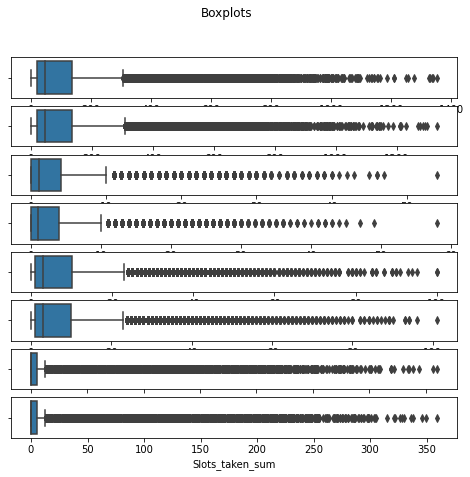

In [ ]:
#Checking for outliers
#
#For our case the sum of cars either taken or returned and charge slots taken and freed
#can take on different counts in accordance with availability in the specific stations thus we don't 
#expect any outlier unless given specific range of values by the car-sharing company as per their operations
#The below boxplots consider the sums at the higher range outliers which is not true.

#Same applies to Postal code, date and daily data points
SumCars = ['BlueCars_taken_sum', 'BlueCars_returned_sum' ,'Utilib_taken_sum',	'Utilib_returned_sum',
	          'Utilib_14_taken_sum','Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(SumCars), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(SumCars):
    sns.boxplot(Autolib[col_val],ax=ax[i])

plt.show


In [ ]:
#Cross checking Outliers on day tpe and day of the week

print('day type:',Autolib['day_type'].unique())
print('day of week:',Autolib['dayOfWeek'].unique())

#There are no outliers,it is in accordance with our specification

day type: ['weekday' 'weekend']
day of week: [0 1 2 3 4 5 6]


In [ ]:
#Creating new column to acccomodate the sum of all cars

Autolib['Total_sum_cars'] = Autolib['BlueCars_taken_sum'] + Autolib['Utilib_taken_sum'] + Autolib['Utilib_14_taken_sum']

Autolib.head()                                    

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_sum_cars
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,123
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,107
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,140
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21,115
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20,123


# Univariate analysis

In [ ]:
#Creating frequency tables for days of the week,daily data points and day type

variables = ['n_daily_data_points','dayOfWeek','day_type']

for variable in variables:
 print(variable)
 print(Autolib[variable].value_counts())

#From the below frequency tables the below is evident:
#1.Data points 1440 and 1439 are among the most commonly used
#2.Monday and Tuesday are the two days that electric cars are most utilised
#3.People tend to use electric cars on Weekdays than weekend

n_daily_data_points
1440    10113
1439     2579
1438      723
1437      411
1425      207
1434      207
1417      206
1411      104
1398      104
1174      104
1429      104
1436      104
1435      104
1203      103
1380      103
1364      103
1420      103
1389      103
1318      103
1320      103
1377      102
1396       98
1370       94
Name: n_daily_data_points, dtype: int64
dayOfWeek
0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64
day_type
weekday    11544
weekend     4541
Name: day_type, dtype: int64


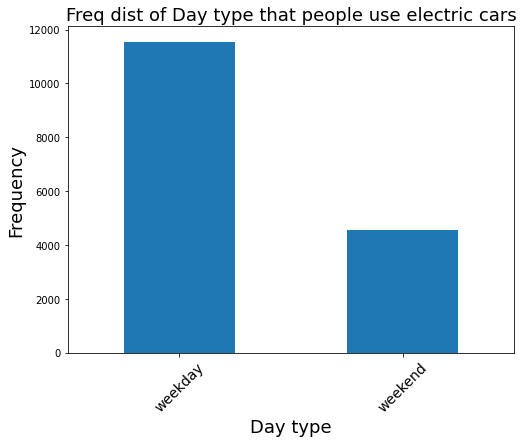

<Figure size 432x288 with 0 Axes>

In [ ]:
#Determining whether Weekend or Weekday is the time most people use electric cars
#
#Bar plot on day types

Autolib['day_type'].value_counts().plot.bar(figsize=(8,6))

plt.title('Freq dist of Day type that people use electric cars',size=18)
plt.xlabel('Day type',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()
plt.savefig('Day_type_frequency_bar_graph.jpg')

#Most people use electric cars from the car-sharing company mostly on weekdays than weekends

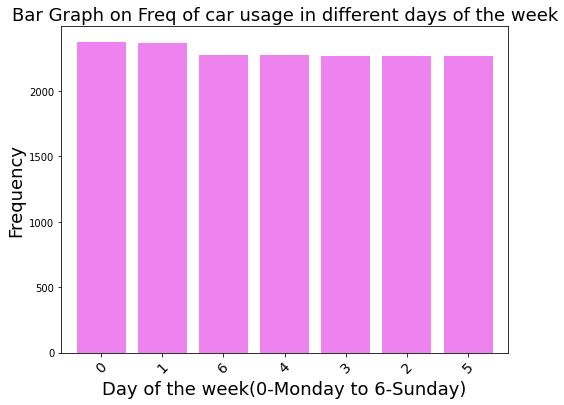

<Figure size 432x288 with 0 Axes>

In [ ]:
#Determining which day of the week has most counts in our data
#

Autolib['dayOfWeek'].value_counts().plot.bar(figsize=(8,6),color='Violet',width=0.8)

plt.title('Bar Graph on Freq of car usage in different days of the week',size=18)
plt.xlabel('Day of the week(0-Monday to 6-Sunday)',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()
plt.savefig('Days of the week freq bar graph.jpg')


#Monday an Tuesday are the days people use shared electric cars most
#Through from the below graph there is minimal difference in the frequency of using
#Shared electric cars among the days of teh week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

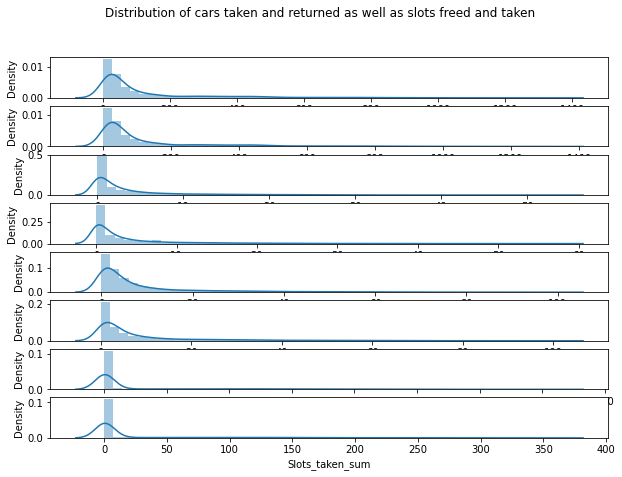

In [ ]:
#Checking the distribution of total Blue,Utilib and Utilib_14 cars taken and returned 
#as well as sum of slots freed and taken

#Variables of interest to check on distribution
SumCars = ['BlueCars_taken_sum', 'BlueCars_returned_sum' ,'Utilib_taken_sum',	'Utilib_returned_sum',
	          'Utilib_14_taken_sum','Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

#Plotting the distribution
fig, ax = plt.subplots(len(SumCars), figsize=(10,7))
fig.suptitle('Distribution of cars taken and returned as well as slots freed and taken')

for i,col_val in enumerate(SumCars):
    sns.distplot(Autolib[col_val],hist=True,ax=ax[i])

#The total Blue,Utilib and Utilib_14 cars taken and returned as well as slots fred and taken 
#seem to follow a normal distribution and the sum is skewed to the right

In [ ]:
#Summary of decriptive statistics for our cars and slots data
#

Autolib[SumCars].describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Bivariate Analysis

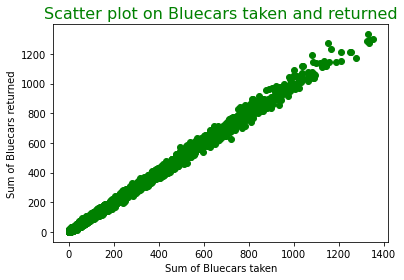

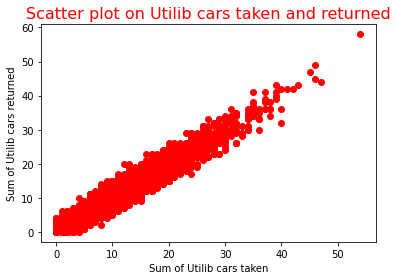

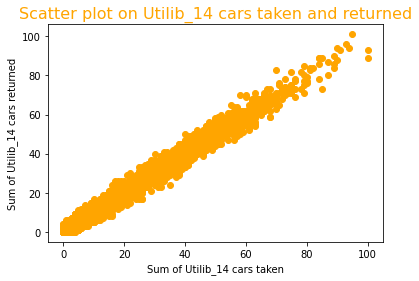

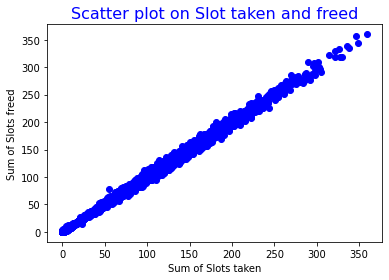

In [ ]:
#Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between Blue cars taken and returned
plt.scatter(Autolib['BlueCars_taken_sum'],Autolib['BlueCars_returned_sum'], color='Green')
plt.title('Scatter plot on Bluecars taken and returned',size=16,color='Green')
plt.xlabel('Sum of Bluecars taken',size=10)
plt.ylabel('Sum of Bluecars returned',size=10)
plt.show()

#Scatter plot to check the relationship between Utilib cars taken and returned
plt.scatter(Autolib['Utilib_taken_sum'],Autolib['Utilib_returned_sum'], color='Red')
plt.title('Scatter plot on Utilib cars taken and returned',size=16,color='Red')
plt.xlabel('Sum of Utilib cars taken',size=10)
plt.ylabel('Sum of Utilib cars returned',size=10)
plt.show()


#Scatter plot to check the relationship between Utilib_14 cars taken and returned
plt.scatter(Autolib['Utilib_14_taken_sum'],Autolib['Utilib_14_returned_sum'], color='Orange')
plt.title('Scatter plot on Utilib_14 cars taken and returned',size=16,color='Orange')
plt.xlabel('Sum of Utilib_14 cars taken',size=10)
plt.ylabel('Sum of Utilib_14 cars returned',size=10)
plt.show()


#Scatter plot to check the relationship between Slots taken and freed
plt.scatter(Autolib['Slots_taken_sum'],Autolib['Slots_freed_sum'], color='Blue')
plt.title('Scatter plot on Slot taken and freed',size=16,color='Blue')
plt.xlabel('Sum of Slots taken',size=10)
plt.ylabel('Sum of Slots freed',size=10)
plt.show()


#For all the below scatter plots we notice a positive linear relationship between the variables

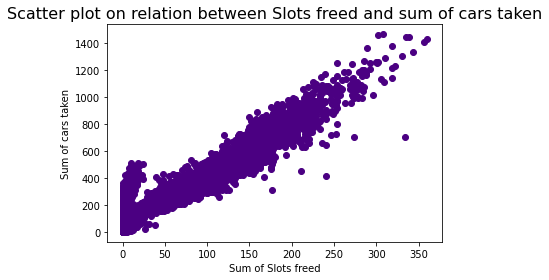

In [ ]:
#Scatter plot to check the relationship between Slots freed and number of total cars taken

plt.scatter(Autolib['Slots_freed_sum'],Autolib['Total_sum_cars'], color='Indigo')
plt.title('Scatter plot on relation between Slots freed and sum of cars taken',size=16)
plt.xlabel('Sum of Slots freed',size=10)
plt.ylabel('Sum of cars taken',size=10)
plt.show()

#There is a positive linear relationship between the Sum of slots freed and sum of cars taken

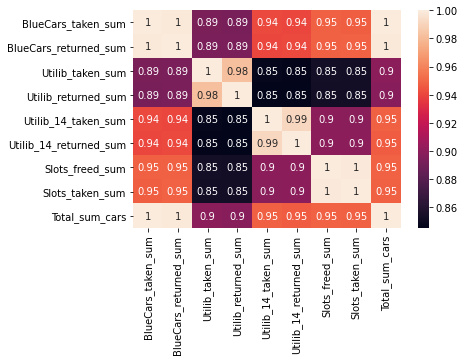

In [ ]:
#Creating the correlation heatmap
#to check the relationship among number of differents types of cars,total cars
#and slots freed and taken

CorrVariables = ['BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum',
                 'Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',
                 'Slots_freed_sum','Slots_taken_sum','Total_sum_cars']
sns.heatmap(Autolib[CorrVariables].corr(),annot=True)
plt.show()

#We notice a strong positive correlation among our variables

Text(0, 0.5, 'Days of the week Count')

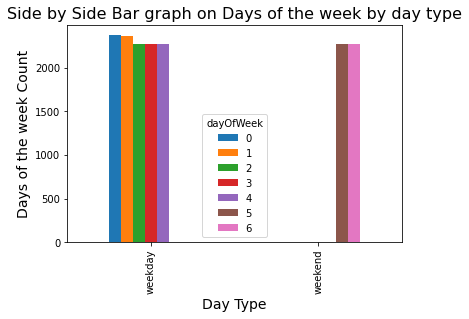

In [ ]:
#Side by side bar graph on days of the week by day type 

#First grouping the dataframe by the two variables
Autolib.groupby(['dayOfWeek','day_type']).count()
Autolib.groupby(['dayOfWeek','day_type']).date.count().unstack()

#Plotting our bar graph 
Autolib.groupby(['day_type','dayOfWeek']).date.count().unstack().plot(kind='bar')

# labels and title
plt.title('Side by Side Bar graph on Days of the week by day type',fontsize=16)
plt.xlabel('Day Type',fontsize=14)
plt.ylabel('Days of the week Count',fontsize=14)


#We notice a direct classification of Monday to Friday as weekday
#And Saturday and Sunday as weekend

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

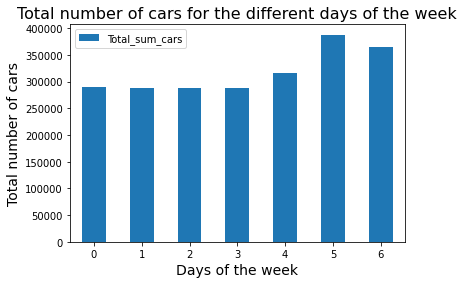

In [ ]:
#Bar graph on total sum of cars for different days of the week
#

#First grouping the dataframe by the two variables
Autolib[['dayOfWeek','Total_sum_cars']].groupby(['dayOfWeek']).sum()


#Creating our bar graph
Autolib[['dayOfWeek','Total_sum_cars']].groupby(['dayOfWeek']).sum().plot(kind='bar')

# labels and title
plt.title('Total number of cars for the different days of the week',fontsize=16)
plt.xlabel('Days of the week',fontsize=14)
plt.ylabel('Total number of cars',fontsize=14)
plt.xticks(rotation=0)

#Pertaining to the number of cars in days of the week,the records on weekends is high
#Saturday and Sunday are the days on weekend

# Multivariate Analysis


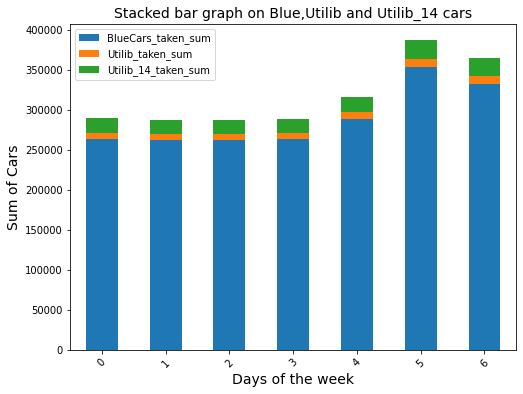

In [ ]:
#Stacked bar chart of Blue,Utilib and Utilib_14 cars

Autolib[['dayOfWeek','BlueCars_taken_sum','Utilib_taken_sum','Utilib_14_taken_sum']].groupby(
                              ['dayOfWeek']).sum().plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Stacked bar graph on Blue,Utilib and Utilib_14 cars", fontsize=14)

# Labeling our y axis
plt.ylabel("Sum of Cars", fontsize=14)

# Labeling our x axis
plt.xlabel("Days of the week", fontsize=14)

# Displaying our chart
plt.show()

#For all days of the week we notice a big number of Bluecars,
#Followed by Utilib_14 and Utilib cars respectively

# Sampling

In [ ]:
#Selecting the data to use for our hypothesis testing
#that is based on two different areas of interest(Postal codes 75015 and 75017)

#First ensuring we have weekday data type from the dataset
Autolib0 = Autolib[Autolib['day_type'] == 'weekday']
Autolib0 

#Data with postal code 75015
Autolib1 = Autolib0[Autolib0['Postal code'] == 75015]
Autolib1

#Data with postal code 75017
Autolib2 = Autolib0[Autolib0['Postal code'] == 75017]
Autolib2


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Total_sum_cars
2496,75017,1/1/2018,1440,0,weekday,634,671,16,15,63,67,159,171,713
2497,75017,1/2/2018,1438,1,weekday,548,542,13,15,40,33,125,126,601
2498,75017,1/3/2018,1439,2,weekday,638,616,15,13,27,26,153,144,680
2499,75017,1/4/2018,1320,3,weekday,553,534,16,17,30,30,141,145,599
2500,75017,1/5/2018,1440,4,weekday,705,703,12,13,40,42,179,180,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,75017,6/13/2018,1440,2,weekday,777,765,21,23,42,42,203,202,840
2646,75017,6/14/2018,1439,3,weekday,710,715,27,27,48,47,185,184,785
2647,75017,6/15/2018,1440,4,weekday,766,753,23,21,54,53,192,189,843
2650,75017,6/18/2018,1440,0,weekday,650,639,15,15,36,30,179,177,701


# Test on normality of the data of the two selected population before sample selection

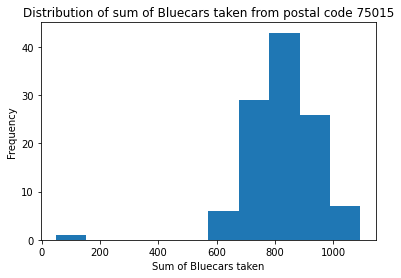

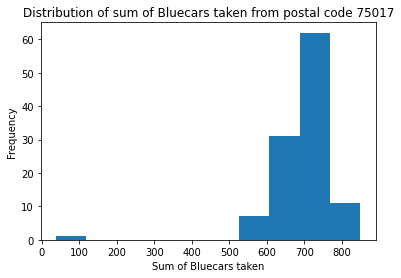

In [ ]:
#Checking normality of the two populations

#Distribution plot(histogram)

Autolib1['BlueCars_taken_sum'].plot.hist()
plt.title('Distribution of sum of Bluecars taken from postal code 75015')
plt.xlabel('Sum of Bluecars taken')
plt.show()

Autolib2['BlueCars_taken_sum'].plot.hist()
plt.title('Distribution of sum of Bluecars taken from postal code 75017')
plt.xlabel('Sum of Bluecars taken')
plt.show()

#From the histogram on both data,tha data does not seem to follow a normal distribution
#And there seems to outlier observation below 200 mark for both data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


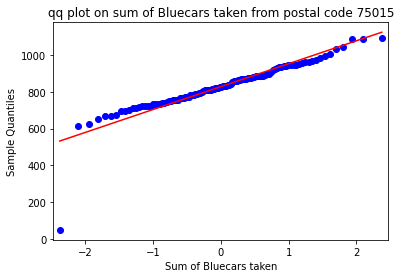

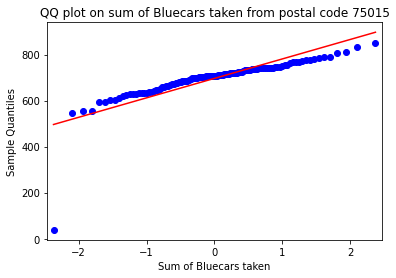

In [ ]:
#QQ plot to check on normality
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(Autolib1['BlueCars_taken_sum'],line='s')
pyplot.title('qq plot on sum of Bluecars taken from postal code 75015')
plt.xlabel('Sum of Bluecars taken')
pyplot.show()


qqplot(Autolib2['BlueCars_taken_sum'],line='s')
plt.title('QQ plot on sum of Bluecars taken from postal code 75015')
plt.xlabel('Sum of Bluecars taken')
pyplot.show()


In [ ]:
#Dealing with outliers in our two population data

#There observations that are clearly outliers hindering the achieving of normal distribution  

#For postal code 75015 we check on observations below 500 as shown by histogram and qqplot

Autolib1[Autolib1['BlueCars_taken_sum'] <= 500] #There is only one observation,we can drop it

Autolib1.drop(Autolib1[Autolib1['BlueCars_taken_sum'] <= 500].index,inplace=True)
Autolib1

#For postal code 75017 we check the observations below 500 as portrayed by histogram and qqplot
Autolib2[Autolib2['BlueCars_taken_sum'] <= 500] #There is only one observation,we can drop it

Autolib2.drop(Autolib2[Autolib2['BlueCars_taken_sum'] <= 500].index,inplace=True)
Autolib2

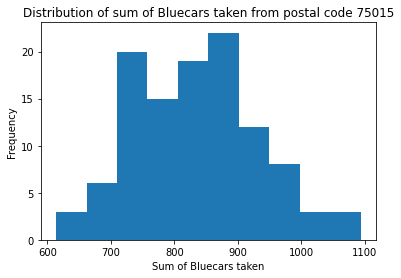

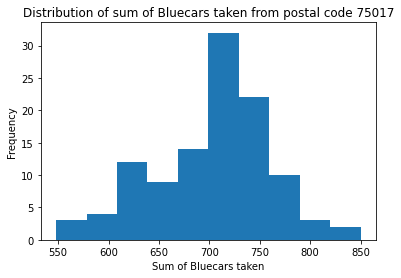

In [ ]:
#Checking for normality after droping the outliers of one observation in each dataset
#for each postal code

#Distribution plot

Autolib1['BlueCars_taken_sum'].plot.hist()
plt.title('Distribution of sum of Bluecars taken from postal code 75015')
plt.xlabel('Sum of Bluecars taken')
plt.show()



Autolib2['BlueCars_taken_sum'].plot.hist()
plt.title('Distribution of sum of Bluecars taken from postal code 75017')
plt.xlabel('Sum of Bluecars taken')
plt.show()

#The data is approximately normally distributed

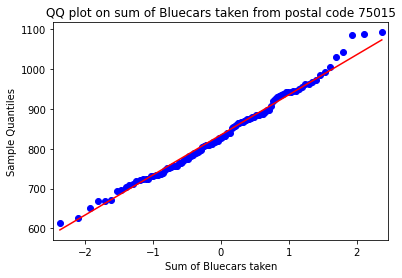

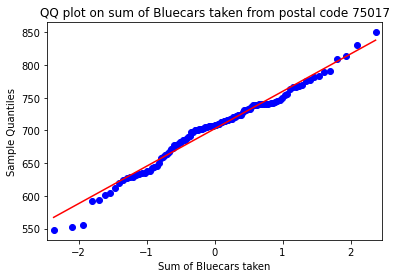

In [ ]:
#Q-Q plot to check on normality after dropping the outlier

qqplot(Autolib1['BlueCars_taken_sum'],line='s')
plt.title('QQ plot on sum of Bluecars taken from postal code 75015')
plt.xlabel('Sum of Bluecars taken')
pyplot.show()


qqplot(Autolib2['BlueCars_taken_sum'],line='s')
plt.title('QQ plot on sum of Bluecars taken from postal code 75017')
plt.xlabel('Sum of Bluecars taken')
pyplot.show()


In [ ]:
#Shapiro-Wilk Test for normality

# importing the shapiro function
from scipy.stats import shapiro 

# testing for normality of postal code 75015 data
stat, p = shapiro(Autolib1['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
 
#testing for normality of postal code 75017 data
stat, p = shapiro(Autolib2['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
#Based on the p-value for the test on both postal code data, the data does 
#seem to follow a normal distribution

Statistics=0.987, p=0.384
Sample looks Gaussian
Statistics=0.981, p=0.112
Sample looks Gaussian


In [ ]:
#Population data summary statistics

print('PostalCode 75015')
print(Autolib1['BlueCars_taken_sum'].describe())

print('Postal code 75017')
print(Autolib2['BlueCars_taken_sum'].describe())


PostalCode 75015
count     111.000000
mean      834.900901
std       101.310589
min       614.000000
25%       757.000000
50%       827.000000
75%       895.000000
max      1093.000000
Name: BlueCars_taken_sum, dtype: float64
Postal code 75017
count    111.000000
mean     702.504505
std       57.401437
min      548.000000
25%      669.500000
50%      709.000000
75%      740.000000
max      850.000000
Name: BlueCars_taken_sum, dtype: float64


#  Sample selection by simple random sampling from the two population dataset


In [ ]:
#The sample from the two dataset will be selected by Simple Random Sampling

# Selecting the sample for Postal code 75015 
Autolib1_sample = Autolib1.sample(n = 15, replace="False")
print(Autolib1_sample)


# Selecting the sample for Postal code 75017
Autolib2_sample = Autolib2.sample(n = 15, replace="False")
print(Autolib2_sample)


      Postal code       date  ...  Slots_taken_sum  Total_sum_cars
2276        75015   4/6/2018  ...              209             954
2230        75015  2/16/2018  ...              271            1020
2245        75015   3/6/2018  ...              247             895
2239        75015  2/28/2018  ...              185             787
2335        75015  6/15/2018  ...              294            1181
2301        75015   5/1/2018  ...              211             952
2187        75015   1/4/2018  ...              158             745
2188        75015   1/5/2018  ...              198             943
2251        75015  3/12/2018  ...              222             818
2209        75015  1/26/2018  ...              248            1058
2287        75015  4/17/2018  ...              193             843
2265        75015  3/26/2018  ...              226             822
2236        75015  2/22/2018  ...              214             839
2279        75015   4/9/2018  ...              217            

In [ ]:
#Checking the statistics summary on sum of blue cars taken from first dataset of Postal code 75015

Autolib1_sample['BlueCars_taken_sum'].describe()  

count      15.000000
mean      826.733333
std       111.153348
min       669.000000
25%       749.000000
50%       829.000000
75%       866.000000
max      1093.000000
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
#Checking the statistics summary on sum of blue cars taken form second dataset of Postal code 75017

Autolib2_sample['BlueCars_taken_sum'].describe() 

count     15.000000
mean     708.866667
std       39.750771
min      632.000000
25%      692.500000
50%      715.000000
75%      739.500000
max      755.000000
Name: BlueCars_taken_sum, dtype: float64

# Hypothesis Testing

In [ ]:
#1.State the nulll and alternative hypothesis

#Ho: mu1 = mu2
#Ha: mu1 != mu2

#2.Assess the conditions
#a) The two samples are reasonably random and drawn randomly from the population and are independent
#b) The two samples were drawn from a population having the normal distribution


#3.Set the level of Significance at 0.05(alpha =0.05)

In [ ]:
#4.Calculating the test Statistic and corresponding p-value


# Importing ttest_ind from scipy.stats
import scipy
from scipy.stats import ttest_ind


# Then calculating the t-test for our samples


scipy.stats.ttest_ind(Autolib1_sample['BlueCars_taken_sum'],Autolib2_sample['BlueCars_taken_sum'],
                      equal_var=False)

#Since the p-value is less than the significance level alpha,we reject the null hypothesis and conclude
#there is enough evidence to show there is difference in number of Blue cars in the two areas
#Postal code 75015 and 75017


Ttest_indResult(statistic=3.867053464187271, pvalue=0.0011784123075674385)

# Point estimate and population parameter confidence Interval determination

In [ ]:
# Point estimate is mean of the two populations

#POINT ESTIMATE OF POSTAL CODE 75015
Mean1 = 827

#POINT ESTIMATE OF POSTAL CODE 75017
Mean1 = 709


In [ ]:
# 95% Confidence Interval for the population parameter that is postal code 75015
#
#Postal code 75015
import numpy as np

Mean1 = 827
n1=15
sd1=111
t =2.145

Lower = Mean1 - (t*(sd1/(np.sqrt(n1))))
Upper = Mean1 +  (t*(sd1/(np.sqrt(n1))))
print([Lower,Upper])


[765.5241353456497, 888.4758646543503]


In [ ]:
# 95% Confidence Interval for the population parameter that is postal code 75017
#
#Postal code 75017

import numpy as np

Mean2 = 709
n2=15
sd2=39
t =2.145

Lower = Mean2 - (t*(sd2/(np.sqrt(n2))))
Upper = Mean2 +  (t*(sd2/(np.sqrt(n2))))
print([Lower,Upper])


[687.4003718782012, 730.5996281217988]
